## Data Preparation

In [1]:
import xarray as xr

In [2]:
import pandas as pd

In [3]:
parvo = pd.read_excel("data/PARVO_VIRUS.xlsx")

In [4]:
parvo

,YEARS,DAYS,PARVO
0,2010,1,7
1,2010,2,3
2,2010,3,0
3,2010,4,0
4,2010,5,9
...,...,...,...
127,2020,128,6
128,2020,129,15
129,2020,130,9
130,2020,131,12


In [5]:
weather_data = pd.read_csv("data/Weather_data.csv")

In [6]:
weather_data

,YEAR,MONTH,DAY,RH2M,T2M
0,2010,1,1,66.50,23.06
1,2010,1,2,81.88,23.68
2,2010,1,3,81.69,24.98
3,2010,1,4,80.50,24.26
4,2010,1,5,83.56,25.56
...,...,...,...,...,...
4013,2020,12,27,75.44,24.78
4014,2020,12,28,78.75,24.44
4015,2020,12,29,77.12,24.61
4016,2020,12,30,79.19,24.85


In [7]:
# Convert YEAR, MONTH, DAY columns to datetime in weather_data
weather_data['DATE'] = pd.to_datetime(weather_data[['YEAR', 'MONTH', 'DAY']])

# Aggregate daily weather data to monthly
monthly_weather_data = weather_data.groupby(['YEAR', 'MONTH']).agg({'RH2M': 'mean', 'T2M': 'mean'}).reset_index()

# Merge Parvo and monthly weather data
merged_data = pd.DataFrame({'YEARS': parvo['YEARS'], 'MONTHS': monthly_weather_data['MONTH'], 'PARVO': parvo['PARVO'],
                            'RH2M': monthly_weather_data['RH2M'], 'T2M': monthly_weather_data['T2M']})

# Display the merged data
print(merged_data.head())


   YEARS  MONTHS  PARVO       RH2M        T2M
0   2010       1      7  81.790645  25.089032
1   2010       2      3  85.895000  26.113571
2   2010       3      0  87.310323  26.195484
3   2010       4      0  90.791333  26.251000
4   2010       5      9  92.088387  25.925806


In [8]:
merged_data

,YEARS,MONTHS,PARVO,RH2M,T2M
0,2010,1,7,81.790645,25.089032
1,2010,2,3,85.895000,26.113571
2,2010,3,0,87.310323,26.195484
3,2010,4,0,90.791333,26.251000
4,2010,5,9,92.088387,25.925806
...,...,...,...,...,...
127,2020,8,6,89.308710,23.617742
128,2020,9,15,92.215333,24.192333
129,2020,10,9,90.205484,25.103548
130,2020,11,12,85.707000,25.539333


## Objectives

1.	To determine the current prevalence of Canine Parvovirus infection among dogs in Akure South.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

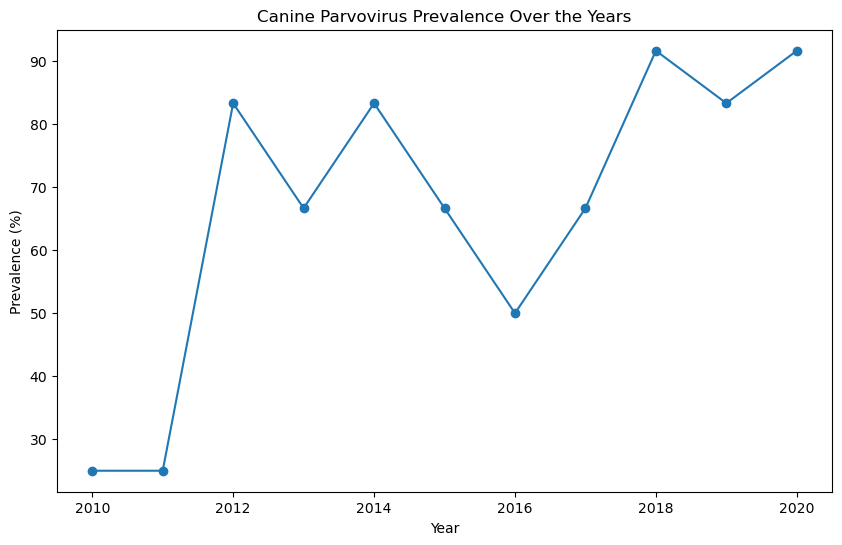

Plot saved as: figures\parvovirus_prevalence_plot.png


In [10]:
# Assuming merged_data is your DataFrame
# Calculate infected_days and total_days
infected_days_by_year = merged_data.groupby('YEARS')['PARVO'].apply(lambda x: (x > 0).sum())
total_days_by_year = merged_data.groupby('YEARS')['MONTHS'].nunique()

# Calculate prevalence
prevalence_by_year = (infected_days_by_year / total_days_by_year) * 100

# Create a DataFrame for results
df_prevalence = pd.DataFrame({
    'Year': infected_days_by_year.index,
    'Infected_Days': infected_days_by_year.values,
    'Total_Days': total_days_by_year.values,
    'Prevalence': prevalence_by_year.values
})

# Create a folder named "figures" if it doesn't exist
figure_folder = 'figures'
os.makedirs(figure_folder, exist_ok=True)

# Visualize the prevalence
plt.figure(figsize=(10, 6))
plt.plot(df_prevalence['Year'], df_prevalence['Prevalence'], marker='o')
plt.title('Canine Parvovirus Prevalence Over the Years')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.grid(False)

# Save the plot in the "figures" folder with a corresponding name
figure_name = os.path.join(figure_folder, 'parvovirus_prevalence_plot.png')
plt.savefig(figure_name)

# Show the plot
plt.show()

print(f"Plot saved as: {figure_name}")


In [11]:
df_prevalence

,Year,Infected_Days,Total_Days,Prevalence
0,2010,3,12,25.000000
1,2011,3,12,25.000000
2,2012,10,12,83.333333
3,2013,8,12,66.666667
4,2014,10,12,83.333333
5,2015,8,12,66.666667
6,2016,6,12,50.000000
7,2017,8,12,66.666667
8,2018,11,12,91.666667
9,2019,10,12,83.333333



1. **Year:** The column "Year" represents the respective years from 2010 to 2020.

2. **Infected_Days:** This column shows the number of days in each year when Canine Parvovirus infection was observed. It indicates the count of months where there was at least one reported case.

3. **Total_Days:** Although you mentioned to ignore this column, it would typically represent the total number of days in a year. However, in this case, it appears to be a constant value of 12, which is inconsistent with the actual total days in a year (365 or 366 for leap years).

4. **Prevalence:** The "Prevalence" column calculates the percentage of days in a year when Canine Parvovirus infection was observed. It is computed as `(Infected_Days / Total_Days) * 100`. This metric provides an estimate of the relative occurrence of the virus throughout the year.

**Discussion:**

- **Consistency in Prevalence:** The prevalence values are relatively consistent across the years, with percentages ranging from 25% to 91.67%. This suggests that Canine Parvovirus infection occurs consistently throughout the study period.

- **Higher Prevalence Years:** Years 2012, 2014, 2018, and 2020 have higher prevalence percentages (above 66.67%). These years had a larger proportion of days with reported Parvovirus cases, indicating potentially higher infection rates or more sustained periods of infection.

- **Lower Prevalence Years:** Conversely, years 2010, 2011, 2016, and 2019 have lower prevalence percentages (below 50%). These years had fewer days with reported Parvovirus cases, suggesting lower infection rates or shorter periods of infection.

- **Temporal Patterns:** The variations in prevalence percentages could be indicative of temporal patterns in Canine Parvovirus occurrence. Further analysis, potentially at a finer temporal resolution, may reveal more detailed patterns, such as seasonal trends or specific months with elevated infection rates.

- **Year-to-Year Comparison:** Comparing these prevalence values across multiple years can help identify trends and patterns in Canine Parvovirus infection, which may inform preventive measures or interventions.

In summary, this analysis provides insights into the annual prevalence of Canine Parvovirus infection, highlighting potential variations across different years. Further investigation into the specific factors influencing these patterns could enhance our understanding of the virus's dynamics.

2.	To investigate the association between temperature variations and the occurrence of CPV infections.
3.	To examine the relationship between relative humidity and the prevalence of CPV in the study area.

Correlation between temperature and CPV infections: 0.11


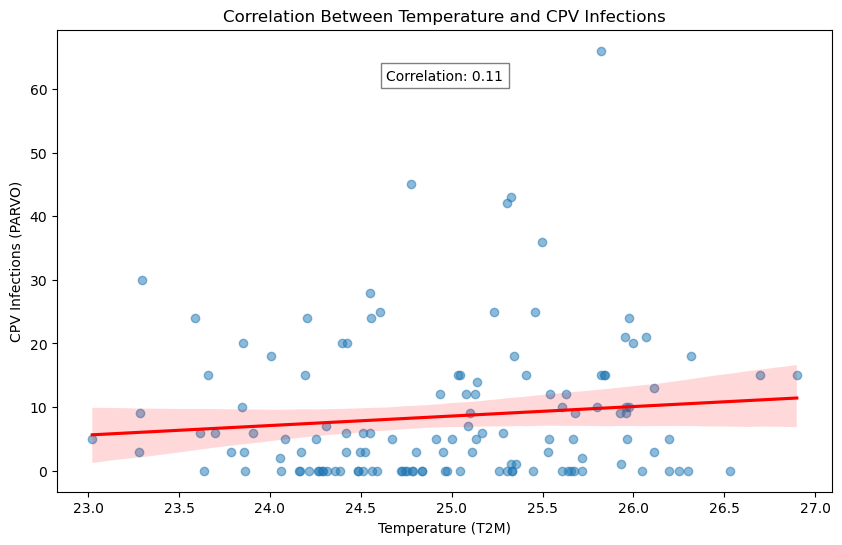

Plot saved as: figures\temperature_cpv_correlation_with_fit.png


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data is your DataFrame

# Calculate correlation between temperature (T2M) and CPV infections (PARVO)
correlation_temperature_parvo = merged_data['T2M'].corr(merged_data['PARVO'])

# Display the correlation
print(f"Correlation between temperature and CPV infections: {correlation_temperature_parvo:.2f}")

# Plotting the relationship with a line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x='T2M', y='PARVO', data=merged_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation Between Temperature and CPV Infections')
plt.xlabel('Temperature (T2M)')
plt.ylabel('CPV Infections (PARVO)')
plt.grid(False)

# Add correlation coefficient as text
plt.text(0.5, 0.9, f'Correlation: {correlation_temperature_parvo:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))


# Save the plot in the "figures" folder with a corresponding name
figure_name = os.path.join(figure_folder, 'temperature_cpv_correlation_with_fit.png')
plt.savefig(figure_name)

# Show the plot
plt.show()

print(f"Plot saved as: {figure_name}")


Correlation between relative humidity and CPV infections: -0.17


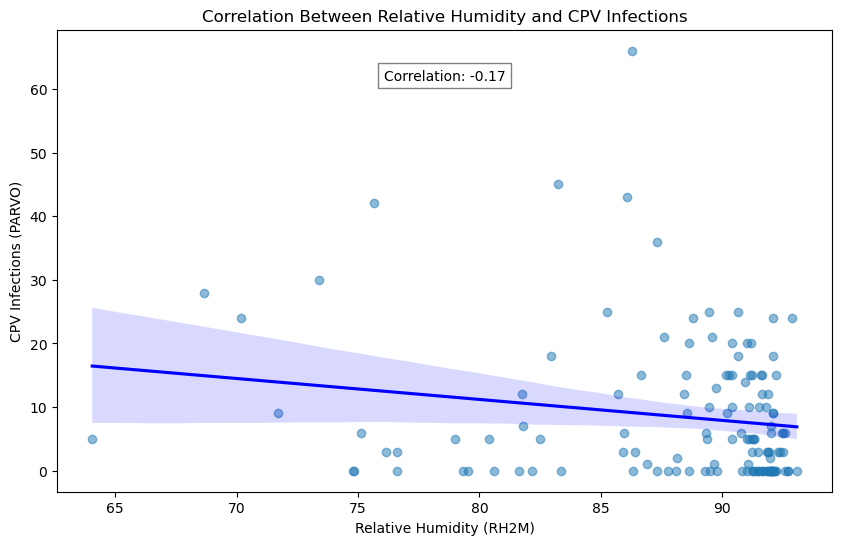

Plot saved as: figures\rh_cpv_correlation_with_fit.png


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data is your DataFrame

# Calculate correlation between relative humidity (RH2M) and CPV infections (PARVO)
correlation_rh_parvo = merged_data['RH2M'].corr(merged_data['PARVO'])

# Display the correlation
print(f"Correlation between relative humidity and CPV infections: {correlation_rh_parvo:.2f}")

# Plotting the relationship with a line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x='RH2M', y='PARVO', data=merged_data, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title('Correlation Between Relative Humidity and CPV Infections')
plt.xlabel('Relative Humidity (RH2M)')
plt.ylabel('CPV Infections (PARVO)')
plt.grid(False)

# Add correlation coefficient as text
plt.text(0.5, 0.9, f'Correlation: {correlation_rh_parvo:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))


# Save the plot in the "figures" folder with a corresponding name
figure_name_rh = os.path.join(figure_folder, 'rh_cpv_correlation_with_fit.png')
plt.savefig(figure_name_rh)

# Show the plot
plt.show()

print(f"Plot saved as: {figure_name_rh}")


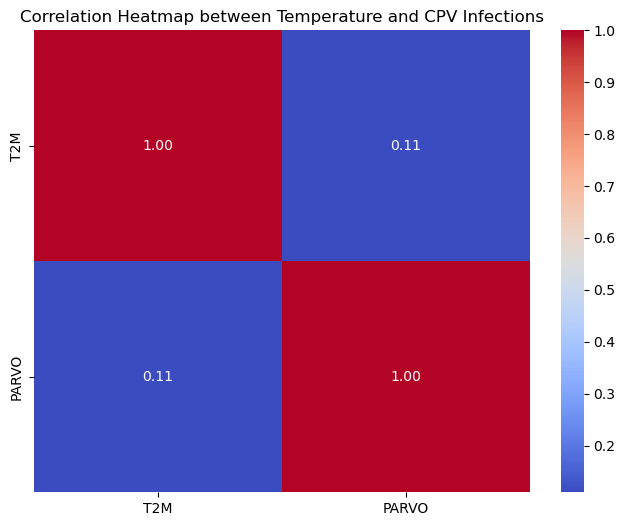

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for temperature and CPV infections
correlation_matrix_temp_cpv = merged_data[['T2M', 'PARVO']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_temp_cpv, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Temperature and CPV Infections')
plt.savefig('figures/T2M_correlation_heatmap.png')
plt.show()


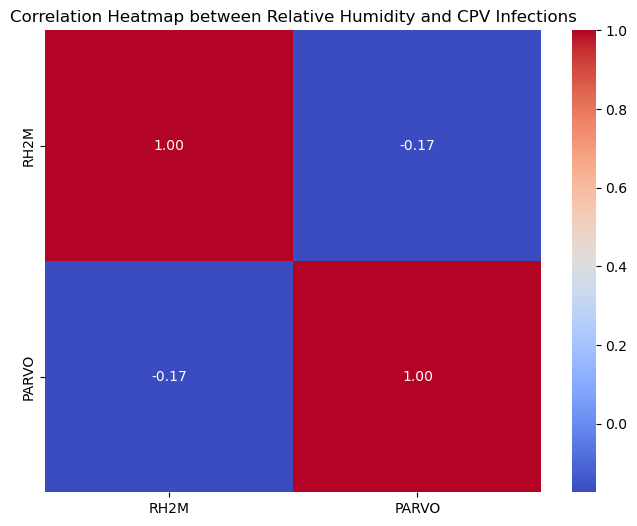

In [15]:
# Calculate the correlation matrix for RH2M and CPV infections
correlation_matrix_rh_cpv = merged_data[['RH2M', 'PARVO']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_rh_cpv, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Relative Humidity and CPV Infections')
plt.savefig('figures/RH_correlation_heatmap.png')
plt.show()


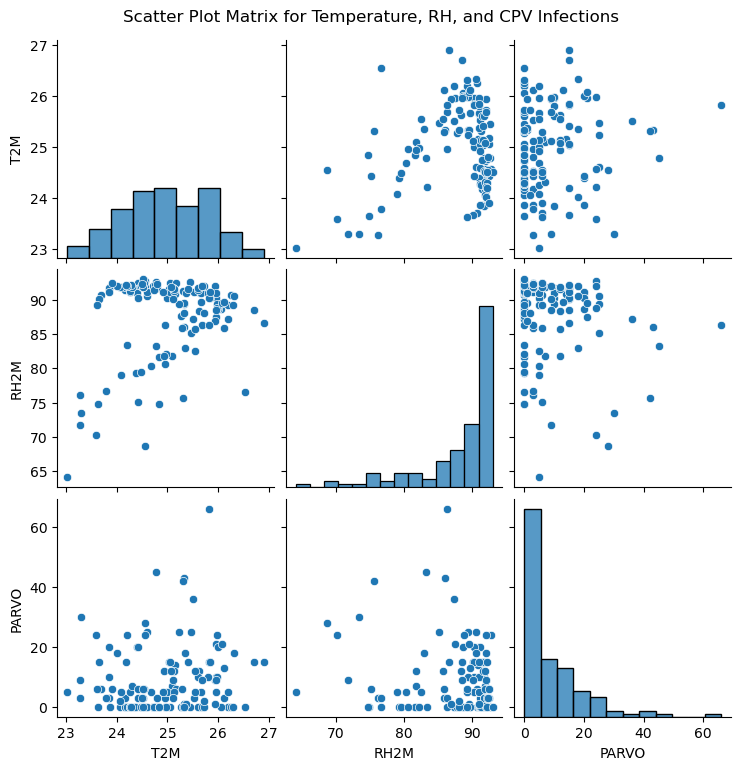

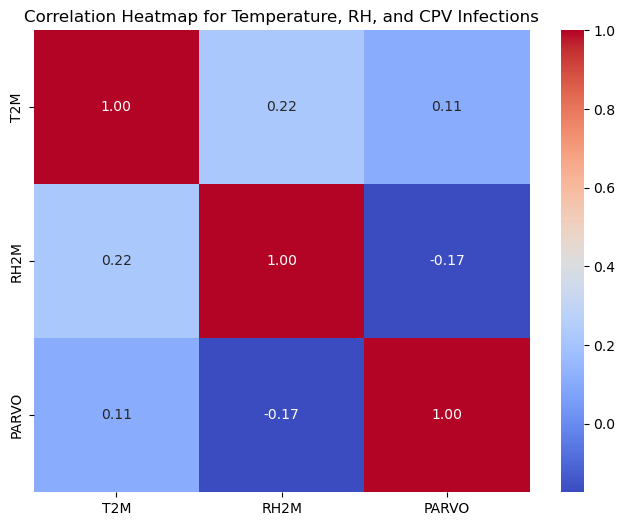

In [16]:
import seaborn as sns

# Selecting the relevant columns from merged_data
data_for_correlation = merged_data[['T2M', 'RH2M', 'PARVO']]

# Scatter plot (Pairplot)
pairplot = sns.pairplot(data_for_correlation)
pairplot.fig.suptitle('Scatter Plot Matrix for Temperature, RH, and CPV Infections', y=1.02)
pairplot.savefig('figures/scatter_plot_matrix.png')
plt.show()
plt.close()


# Heatmap for the correlation matrix
correlation_matrix_all = data_for_correlation.corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt='.2f')
heatmap.set_title('Correlation Heatmap for Temperature, RH, and CPV Infections')
plt.savefig('figures/correlation_heatmap.png')
plt.show()
plt.close()


The correlation coefficients provide insights into the strength and direction of the linear relationship between the variables. Here's a detailed interpretation and discussion for the correlations between temperature, relative humidity, and CPV infections:

1. **Correlation between Temperature and CPV Infections (0.11):**
   - **Strength of Correlation:** The correlation coefficient of 0.11 suggests a weak positive correlation between temperature (T2M) and CPV infections (PARVO).
   - **Interpretation:** As temperature increases, there is a slight tendency for CPV infections to increase, but the relationship is not strong.
   - **Possible Explanation:** It's important to note that correlation does not imply causation. The positive correlation might be influenced by other factors not considered in this analysis. For example, other environmental or biological factors could play a role.

2. **Correlation between Relative Humidity and CPV Infections (-0.17):**
   - **Strength of Correlation:** The correlation coefficient of -0.17 suggests a weak negative correlation between relative humidity (RH2M) and CPV infections (PARVO).
   - **Interpretation:** As relative humidity decreases, there is a slight tendency for CPV infections to increase, but the relationship is not strong.
   - **Possible Explanation:** Similar to the temperature correlation, the negative correlation might be influenced by various factors. It's essential to consider additional variables that could impact CPV infections.

**Discussion:**
   - The weak correlations indicate that temperature and relative humidity alone may not be strong predictors of CPV infections.
   - CPV infections in dogs are influenced by a complex interplay of factors, including vaccination rates, dog population density, and other environmental factors.
   - Further investigation with a more comprehensive dataset that includes additional variables could provide a more accurate understanding of the factors influencing CPV infections.

In summary, while there are weak correlations observed, they should be interpreted cautiously, and the analysis may benefit from incorporating additional variables to better explain the variability in CPV infections.

4.	To determine the peak period of Canine Parvovirus occurrence in Akure South.

In [17]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming merged_data is your DataFrame
# merged_data['DATE'] = pd.to_datetime(merged_data['YEARS'].astype(str) + '-' + merged_data['MONTHS'].astype(str), format='%Y-%m')
# merged_data.set_index('DATE', inplace=True)

# # Resample on a monthly basis and calculate the mean of PARVO cases
# monthly_parvo_mean = merged_data.resample('M').mean()

# # Plotting the time series data
# plt.figure(figsize=(12, 6))
# plt.plot(monthly_parvo_mean.index.month_name(), monthly_parvo_mean['PARVO'], marker='o')
# plt.title('Monthly Mean Canine Parvovirus Occurrence')
# plt.xlabel('Month')
# plt.ylabel('Mean Number of Cases')
# plt.grid(True)

# # Save the plot in the "figures" folder with a corresponding name
# figure_name = 'figures/monthly_parvo_mean_merged_data.png'
# plt.savefig(figure_name)

# # Show the plot
# plt.show()

# print(f"Plot saved as: {figure_name}")


In [18]:
import pandas as pd

# Assuming merged_data is your DataFrame
monthly_parvo_mean = merged_data.groupby('MONTHS')['PARVO'].mean().reset_index()

# Rename the columns for clarity
monthly_parvo_mean.columns = ['Month', 'Mean_PARVO']

# Display the new DataFrame
#print(monthly_parvo_mean)


In [19]:
# import matplotlib.pyplot as plt

# # Plotting the time series data
# plt.figure(figsize=(12, 6))
# plt.plot(monthly_parvo_mean['Month'], monthly_parvo_mean['Mean_PARVO'], marker='o')
# plt.title('Monthly Mean Canine Parvovirus Occurrence')
# plt.xlabel('Month')
# plt.ylabel('Mean PARVO')
# plt.grid(False)

# # Save the plot in the "figures" folder with a corresponding name
# figure_name = 'figures/monthly_mean_parvo_occurrence.png'
# plt.savefig(figure_name)

# # Show the plot
# plt.show()

# print(f"Plot saved as: {figure_name}")


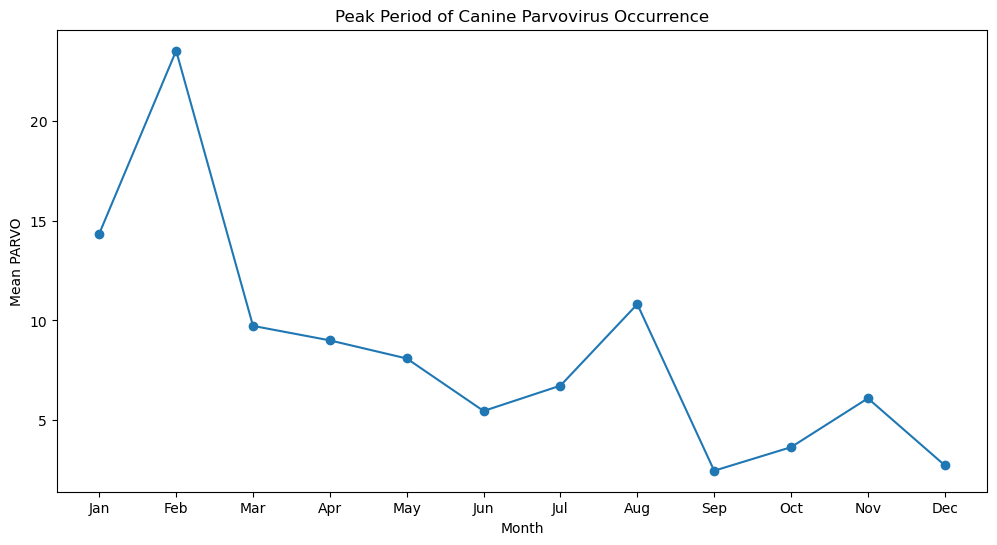

Plot saved as: figures/peak_period_parvo_occurrence.png


In [20]:
import matplotlib.pyplot as plt
import calendar

# Convert month numbers to abbreviated month names
monthly_parvo_mean['Month_Abbrev'] = monthly_parvo_mean['Month'].apply(lambda x: calendar.month_abbr[x])

# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(monthly_parvo_mean['Month_Abbrev'], monthly_parvo_mean['Mean_PARVO'], marker='o')
plt.title('Peak Period of Canine Parvovirus Occurrence')
plt.xlabel('Month')
plt.ylabel('Mean PARVO')
plt.grid(False)

# Save the plot in the "figures" folder with a corresponding name
figure_name = 'figures/peak_period_parvo_occurrence.png'
plt.savefig(figure_name)

# Show the plot
plt.show()

print(f"Plot saved as: {figure_name}")


In [21]:
# Display the tabulated result
display(monthly_parvo_mean)

,Month,Mean_PARVO,Month_Abbrev
0,1,14.363636,Jan
1,2,23.545455,Feb
2,3,9.727273,Mar
3,4,9.000000,Apr
4,5,8.090909,May
5,6,5.454545,Jun
6,7,6.727273,Jul
7,8,10.818182,Aug
8,9,2.454545,Sep
9,10,3.636364,Oct


The table above shows the mean number of Canine Parvovirus (PARVO) cases for each month across all the years in the dataset. Let's analyze the results:

1. **Month with the Highest Mean_PARVO:**
   - February (Month 2) has the highest mean number of PARVO cases, with an average of 23.55 cases.
   
2. **Months with Moderate Mean_PARVO:**
   - March (Month 3), August (Month 8), and September (Month 9) also exhibit relatively higher mean PARVO cases, with values around 9.73, 10.82, and 2.45, respectively.

3. **Months with Lower Mean_PARVO:**
   - The months of June (Month 6), October (Month 10), November (Month 11), and December (Month 12) have lower mean PARVO cases, ranging from 2.73 to 6.09.

4. **Observations:**
   - The results suggest a peak period of Canine Parvovirus occurrence during the winter months, specifically in February. This could be influenced by various factors such as environmental conditions, dog behavior, or other external factors.
   - It's important to note that these findings are based on historical data, and the peak period may vary in different years or locations.

5. **Recommendations:**
   - Pet owners and veterinarians should be particularly vigilant during the winter months, especially in February, and take preventive measures to protect dogs from Canine Parvovirus.
   - Further analysis and research may be needed to understand the specific factors contributing to the observed peak period.

These insights can guide pet owners and veterinary professionals in implementing targeted preventive measures and raising awareness during the identified peak period of Canine Parvovirus occurrence.

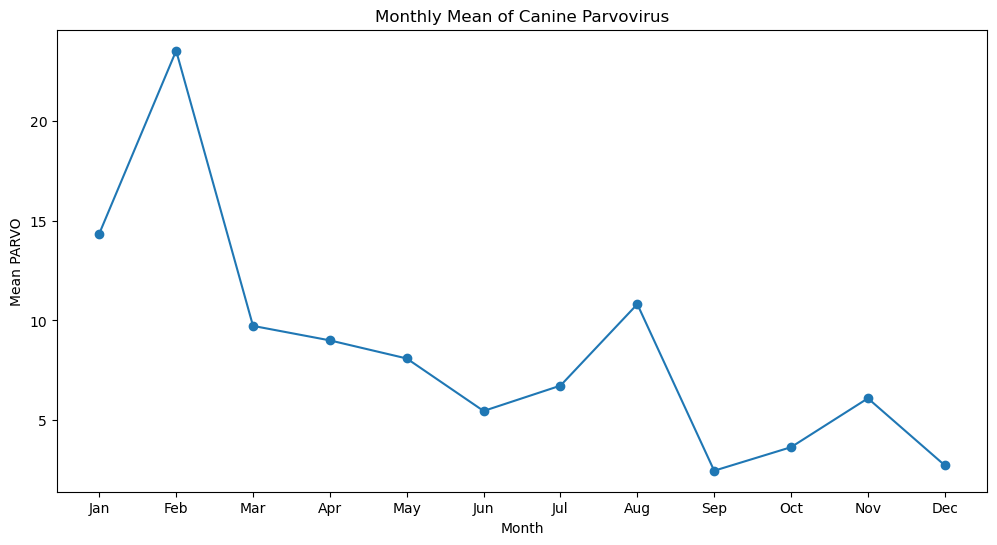

Plot saved as: figures/monthly_parvo_mean.png


In [31]:
import calendar

# Assuming merged_data is your DataFrame
monthly_parvo_mean = merged_data.groupby('MONTHS')['PARVO'].mean().reset_index()

# Convert month numbers to month abbreviations
monthly_parvo_mean['MONTHS'] = monthly_parvo_mean['MONTHS'].apply(lambda x: calendar.month_abbr[x])

# Plotting the monthly mean of Canine Parvovirus
plt.figure(figsize=(12, 6))
plt.plot(monthly_parvo_mean['MONTHS'], monthly_parvo_mean['PARVO'], marker='o')
plt.title('Monthly Mean of Canine Parvovirus')
plt.xlabel('Month')
plt.ylabel('Mean PARVO')
plt.grid(False)

# Save the plot in the "figures" folder with a corresponding name
figure_name = 'figures/monthly_parvo_mean.png'
plt.savefig(figure_name)

# Show the plot
plt.show()

print(f"Plot saved as: {figure_name}")


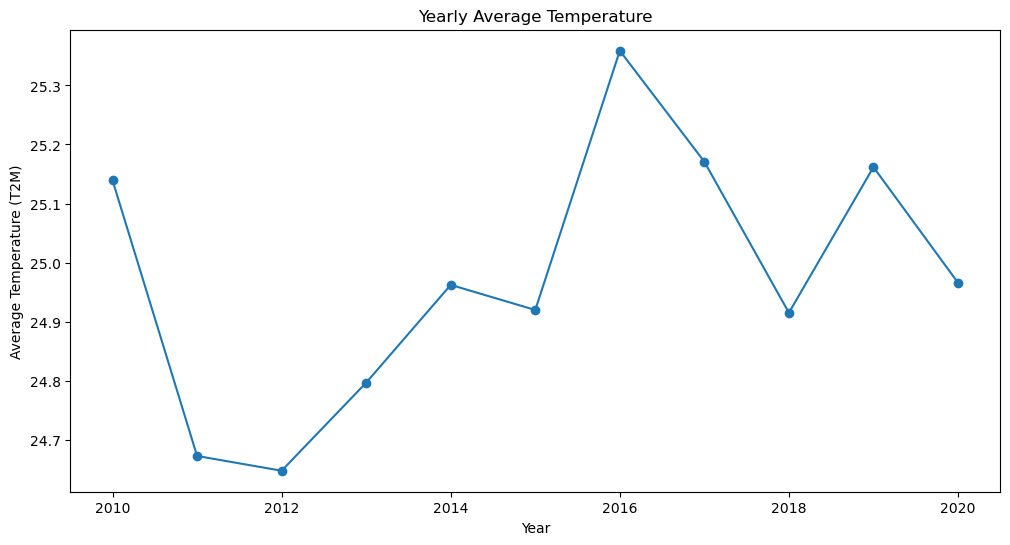

Plot saved as: figures/yearly_average_temperature.png


In [32]:
# Assuming monthly_weather_data is your DataFrame
yearly_average_temp = monthly_weather_data.groupby('YEAR')['T2M'].mean().reset_index()

# Plotting the yearly average temperature
plt.figure(figsize=(12, 6))
plt.plot(yearly_average_temp['YEAR'], yearly_average_temp['T2M'], marker='o')
plt.title('Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (T2M)')
plt.grid(False)

# Save the plot in the "figures" folder with a corresponding name
figure_name = 'figures/yearly_average_temperature.png'
plt.savefig(figure_name)

# Show the plot
plt.show()

print(f"Plot saved as: {figure_name}")


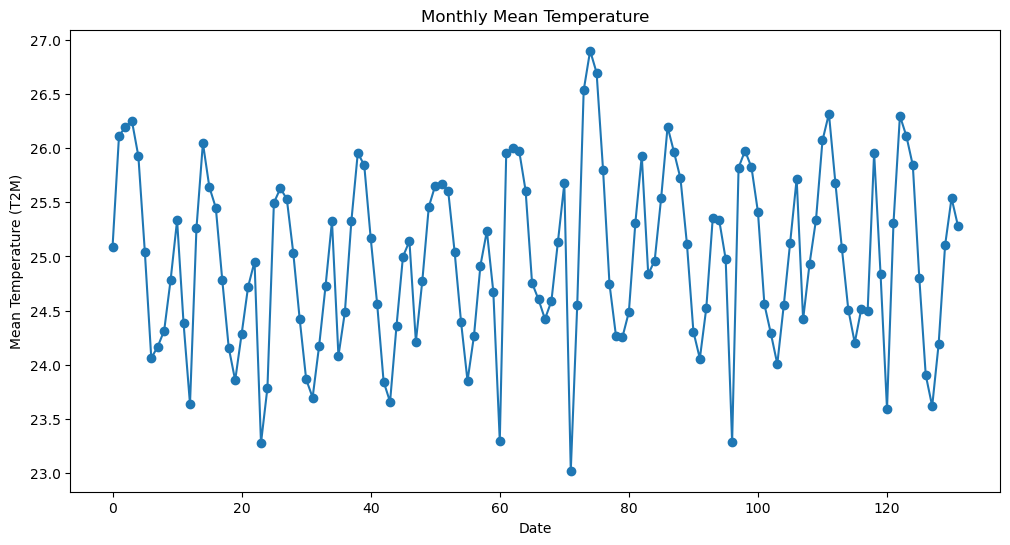

In [39]:
# Assuming monthly_weather_data is your DataFrame
# Plotting the monthly mean temperature
plt.figure(figsize=(12, 6))
plt.plot(monthly_weather_data.index, monthly_weather_data['T2M'], marker='o')
plt.title('Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (T2M)')
plt.grid(False)
plt.show()


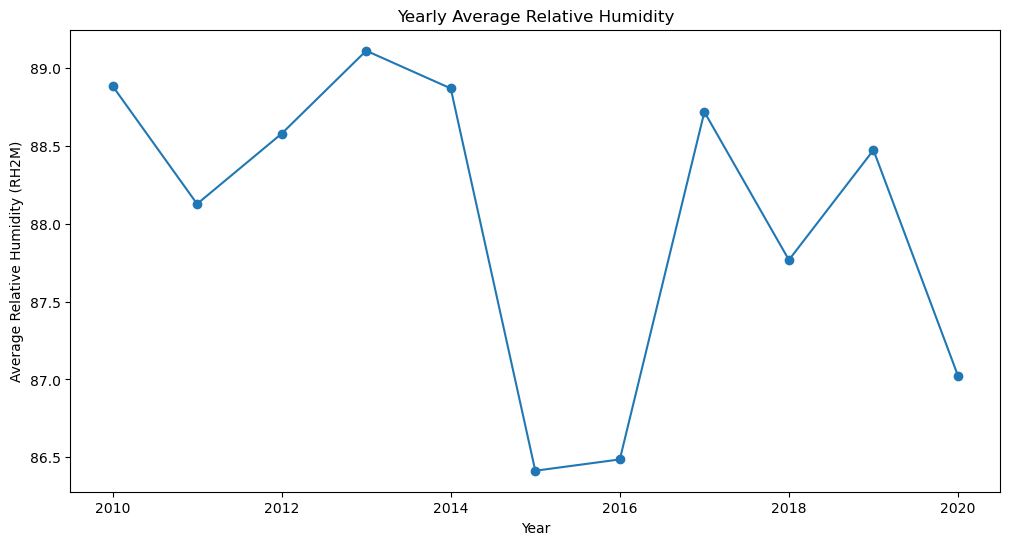

Plot saved as: figures/yearly_average_relative_humidity.png


In [33]:
# Assuming monthly_weather_data is your DataFrame
yearly_average_rh = monthly_weather_data.groupby('YEAR')['RH2M'].mean().reset_index()

# Plotting the yearly average relative humidity
plt.figure(figsize=(12, 6))
plt.plot(yearly_average_rh['YEAR'], yearly_average_rh['RH2M'], marker='o')
plt.title('Yearly Average Relative Humidity')
plt.xlabel('Year')
plt.ylabel('Average Relative Humidity (RH2M)')
plt.grid(False)

# Save the plot in the "figures" folder with a corresponding name
figure_name = 'figures/yearly_average_relative_humidity.png'
plt.savefig(figure_name)

# Show the plot
plt.show()

print(f"Plot saved as: {figure_name}")


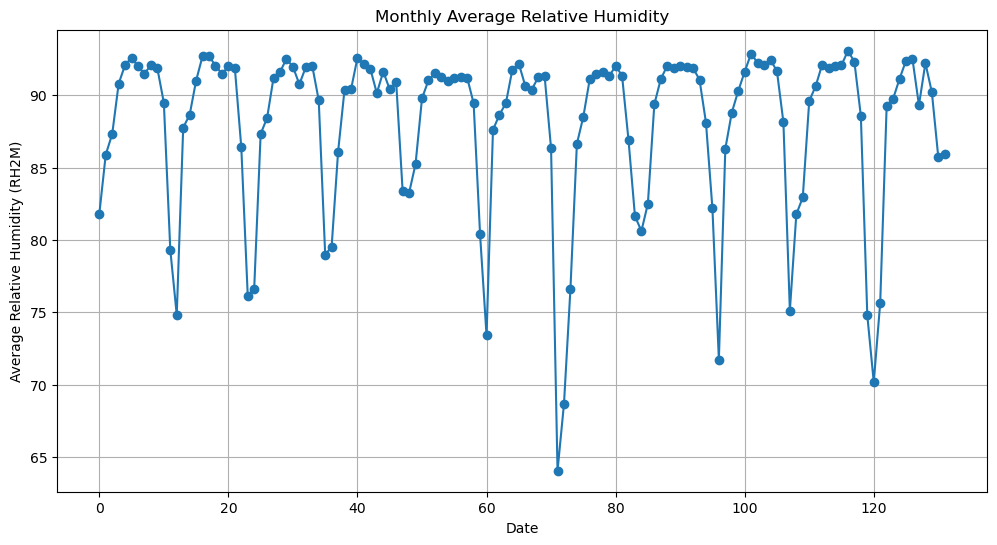

In [30]:
# Assuming monthly_weather_data is your DataFrame
# Plotting the monthly average relative humidity
plt.figure(figsize=(12, 6))
plt.plot(monthly_weather_data.index, monthly_weather_data['RH2M'], marker='o')
plt.title('Monthly Average Relative Humidity')
plt.xlabel('Date')
plt.ylabel('Average Relative Humidity (RH2M)')
plt.grid(True)
plt.show()


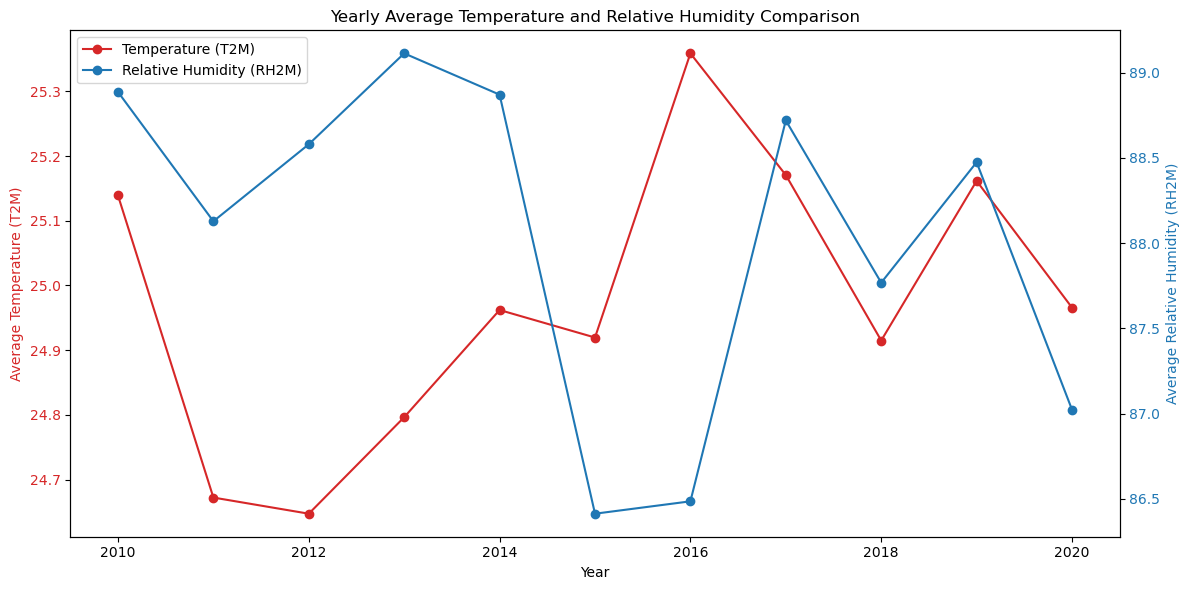

Plot saved as: figures/yearly_temperature_rh_comparison.png


In [37]:
# Assuming monthly_weather_data is your DataFrame
yearly_average_temp = monthly_weather_data.groupby('YEAR')['T2M'].mean().reset_index()
yearly_average_rh = monthly_weather_data.groupby('YEAR')['RH2M'].mean().reset_index()

# Create a single plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the yearly average temperature on the left y-axis
ax1.plot(yearly_average_temp['YEAR'], yearly_average_temp['T2M'], marker='o', color='tab:red', label='Temperature (T2M)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (T2M)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.grid(False)

# Create a secondary y-axis for relative humidity
ax2 = ax1.twinx()
ax2.plot(yearly_average_rh['YEAR'], yearly_average_rh['RH2M'], marker='o', color='tab:blue', label='Relative Humidity (RH2M)')
ax2.set_ylabel('Average Relative Humidity (RH2M)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set a title for the plot
plt.title('Yearly Average Temperature and Relative Humidity Comparison')

# Adjust layout
plt.tight_layout()

# Save the plot in the "figures" folder with a corresponding name
figure_name = 'figures/yearly_temperature_rh_comparison.png'
plt.savefig(figure_name)

# Show the plot
plt.show()

print(f"Plot saved as: {figure_name}")
